In [1]:
from plotnine import *
from sklearn.decomposition import PCA
import pandas as pd
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np


In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)


In [3]:
import inspect
import sklearn.datasets
inspect.getmembers(sklearn.datasets)[0][1]

['clear_data_home',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_species_distributions',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_rcv1',
 'fetch_kddcup99',
 'fetch_openml',
 'get_data_home',
 'load_boston',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_breast_cancer',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_circles',
 'make_classification',
 'make_checkerboard',
 'make_friedman1',
 'make_friedman2',
 'make_friedman3',
 'make_gaussian_quantiles',
 'make_hastie_10_2',
 'make_low_rank_matrix',
 'make_moons',
 'make_multilabel_classification',
 'make_regression',
 'make_s_curve',
 'make_sparse_coded_signal',
 'make_sparse_spd_matrix',
 'make_sparse_uncorrelated',
 'make_spd_matrix',
 'make_swiss_roll']

In [4]:
for i in['load_boston', 'load_diabetes', 'load_digits', 'load_iris', 'load_breast_cancer', 'load_wine']:
    print(i)
    exec(f'from sklearn.datasets import {i}')
    exec(f'data = {i}()')
    df = pd.DataFrame(data.data, columns=data.feature_names)
    df['target'] = pd.Series(data.target)
    print(df.shape)
    print(df.target.nunique())

load_boston
(506, 14)
229
load_diabetes
(442, 11)
214
load_digits
(1797, 65)
10
load_iris
(150, 5)
3
load_breast_cancer
(569, 31)
2
load_wine
(178, 14)
3


In [5]:
 i =  'load_digits'
exec(f'from sklearn.datasets import {i}')
exec(f'data = {i}()')
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)

In [6]:
print(df.columns)
df.head()
df.shape

Index(['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4',
       'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1',
       'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6',
       'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3',
       'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0',
       'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5',
       'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2',
       'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7',
       'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4',
       'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1',
       'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6',
       'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3',
       'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7', 'target'],
      dtype='object')


(1797, 65)

In [7]:
features = df.columns.to_list()
features.pop(-1)
#grab all numeric columns of interest
z = StandardScaler()
df[features] = z.fit_transform(df[features])

In [8]:
# ggplot(df, aes(x = "mean radius", y = "mean texture")) + geom_point()

In [9]:
pca = PCA()
pca.fit(df[features])
pca.explained_variance_ratio_

array([1.20339161e-01, 9.56105440e-02, 8.44441489e-02, 6.49840791e-02,
       4.86015488e-02, 4.21411987e-02, 3.94208280e-02, 3.38938092e-02,
       2.99822101e-02, 2.93200255e-02, 2.78180546e-02, 2.57705509e-02,
       2.27530332e-02, 2.22717974e-02, 2.16522943e-02, 1.91416661e-02,
       1.77554709e-02, 1.63806927e-02, 1.59646017e-02, 1.48919119e-02,
       1.34796957e-02, 1.27193137e-02, 1.16583735e-02, 1.05764660e-02,
       9.75315947e-03, 9.44558990e-03, 8.63013827e-03, 8.36642854e-03,
       7.97693248e-03, 7.46471371e-03, 7.25582151e-03, 6.91911245e-03,
       6.53908536e-03, 6.40792574e-03, 5.91384112e-03, 5.71162405e-03,
       5.23636803e-03, 4.81807586e-03, 4.53719260e-03, 4.23162753e-03,
       4.06053070e-03, 3.97084808e-03, 3.56493303e-03, 3.40787181e-03,
       3.27835335e-03, 3.11032007e-03, 2.88575294e-03, 2.76489264e-03,
       2.59174941e-03, 2.34483006e-03, 2.18256858e-03, 2.03597635e-03,
       1.95512426e-03, 1.83318499e-03, 1.67946387e-03, 1.61236062e-03,
      

In [10]:
pcaDF = pd.DataFrame({"pc": range(1,df.shape[1]),"expl_var" : pca.explained_variance_ratio_,  "cum_var": pca.explained_variance_ratio_.cumsum()})
pcaDF

,pc,expl_var,cum_var
0,1,1.203392e-01,0.120339
1,2,9.561054e-02,0.215950
2,3,8.444415e-02,0.300394
3,4,6.498408e-02,0.365378
4,5,4.860155e-02,0.413979
...,...,...,...
59,60,1.036957e-03,0.999175
60,61,8.253509e-04,1.000000
61,62,3.234759e-33,1.000000
62,63,6.393522e-34,1.000000


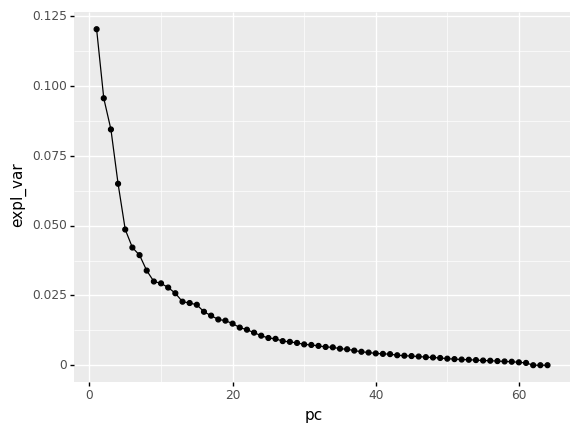

<ggplot: (105068353717)>

In [11]:
(ggplot(pcaDF, aes(x = "pc", y = "expl_var")) + geom_line() + geom_point())

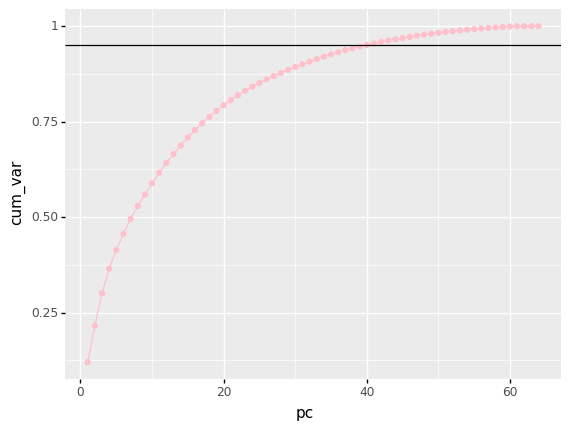

<ggplot: (105068335794)>

In [12]:
(ggplot(pcaDF, aes(x = "pc", y = "cum_var")) + geom_line(color = "pink") +
 geom_point(color = "pink") + geom_hline(yintercept = 0.95))

In [13]:
data = pca.transform(df[features])

In [22]:
import time

In [28]:
#modeMod1
start = time.time()
lr1 = LogisticRegression(max_iter=1000)
lr1.fit(df[features], df["target"])
print("all data: ", lr1.score(df[features], df["target"]))
print(f'This Took {time.time() - start}')

start = time.time()
df10 = pd.DataFrame(data[:, 0:10])
lr2 = LogisticRegression(max_iter=1000)
lr2.fit(df10, df["target"])
print("10 PCs:   ", lr2.score(df10, df["target"]))
print(f'This Took {time.time() - start}')

start = time.time()
df20 = pd.DataFrame(data[:,0:20])
lr3 = LogisticRegression(max_iter=1000)
lr3.fit(df20, df["target"])
print("20 PCs:    ", lr3.score(df20, df["target"]))
print(f'This Took {time.time() - start}')


start = time.time()
df30 = pd.DataFrame(data[:,0:30])
lr4 = LogisticRegression(max_iter=1000)
lr4.fit(df30, df["target"])
print("30 PCs:    ", lr4.score(df30, df["target"]))
print(f'This Took {time.time() - start}')

start = time.time()
df40 = pd.DataFrame(data[:,0:40])
lr5 = LogisticRegression(max_iter=1000)
lr5.fit(df40, df["target"])
print("40 PCs:    ", lr5.score(df40, df["target"]))
print(f'This Took {time.time() - start}')

start = time.time()
df50 = pd.DataFrame(data[:,0:50])
lr5 = LogisticRegression(max_iter=1000)
lr5.fit(df50, df["target"])
print("50 PCs:    ", lr5.score(df50, df["target"]))
print(f'This Took {time.time() - start}')

start = time.time()
df60 = pd.DataFrame(data[:,0:60])
lr5 = LogisticRegression(max_iter=1000)
lr5.fit(df60, df["target"])
print("60 PCs:    ", lr5.score(df60, df["target"]))
print(f'This Took {time.time() - start}')

all data:  0.9988870339454646
This Took 0.16203641891479492
10 PCs:    0.899276572064552
This Took 0.1780407428741455
20 PCs:     0.9710628825820813
This Took 0.18004107475280762
30 PCs:     0.9872008903728436
This Took 0.17304039001464844
40 PCs:     0.993322203672788
This Took 0.1600344181060791
50 PCs:     0.998330550918197
This Took 0.15703558921813965
60 PCs:     0.998330550918197
This Took 0.17504024505615234


we can see that it gives some good answers withing some better time 

In [30]:
%%timeit
start = time.time()
df50 = pd.DataFrame(data[:,0:50])
lr5 = LogisticRegression(max_iter=1000)
lr5.fit(df50, df["target"])

165 ms ± 12.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [32]:
%%timeit
lr1 = LogisticRegression(max_iter=1000)
lr1.fit(df[features], df["target"])

170 ms ± 793 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [33]:
print("50 PCs:    ", lr5.score(df50, df["target"]))

50 PCs:     0.998330550918197


In [34]:
print("20 PCs:    ", lr3.score(df20, df["target"]))

20 PCs:     0.9710628825820813


the time differ some with nearly same accuracy 

In [41]:
 i =  'load_wine'
exec(f'from sklearn.datasets import {i}')
exec(f'data = {i}()')
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)
features = df.columns.to_list()
features.pop(-1)
#grab all numeric columns of interest
z = StandardScaler()
df[features] = z.fit_transform(df[features])
pca = PCA()
pca.fit(df[features])
pca.explained_variance_ratio_
data = pca.transform(df[features])
#modeMod1
start = time.time()
lr1 = LogisticRegression(max_iter=1000)
lr1.fit(df[features], df["target"])
print("all data: ", lr1.score(df[features], df["target"]))
print(f'This Took {time.time() - start}')

start = time.time()
df2 = pd.DataFrame(data[:, 0:2])
lr2 = LogisticRegression(max_iter=1000)
lr2.fit(df2, df["target"])
print("2 PCs:   ", lr2.score(df2, df["target"]))
print(f'This Took {time.time() - start}')

start = time.time()
df3 = pd.DataFrame(data[:,0:10])
lr3 = LogisticRegression(max_iter=1000)
lr3.fit(df3, df["target"])
print("10 PCs:    ", lr3.score(df3, df["target"]))
print(f'This Took {time.time() - start}')

all data:  1.0
This Took 0.01700425148010254
2 PCs:    0.9662921348314607
This Took 0.009001970291137695
10 PCs:     1.0
This Took 0.013002872467041016
